<a href="https://colab.research.google.com/github/Manu-Gr/Assignment-Simple-Linear-Regression/blob/main/Assignment_Simple_Linear_Regression_Delivery_Time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   1) Delivery_time -> Predict delivery time using sorting time  
  
   Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using Python.


In [ ]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels as smf

In [ ]:
dataset = pd.read_csv("delivery_time.csv")
dataset.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [ ]:
dataset.shape

(21, 2)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


Feature Engineering

In [ ]:
# Rename the columns

dataset_1 = dataset.rename({'Delivery Time':'Delivery_time', 'Sorting Time':'Sorting_time'}, axis=1)
dataset_1

,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


EDA AND VISUALIZATION

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


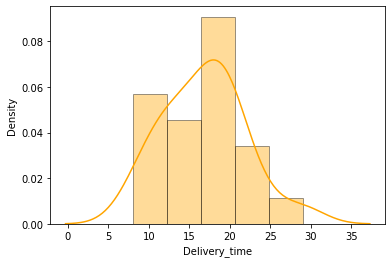

In [ ]:
import seaborn as sns
sns.distplot(dataset_1['Delivery_time'],color='orange',hist_kws =dict(edgecolor = 'black'))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


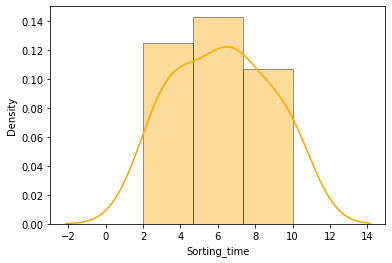

In [ ]:
import seaborn as sns
sns.distplot(dataset_1['Sorting_time'],color='orange',hist_kws =dict(edgecolor = 'black'))

Outlier Detection

In [ ]:
dataset_1['Delivery_time'].describe()

count    21.000000
mean     16.790952
std       5.074901
min       8.000000
25%      13.500000
50%      17.830000
75%      19.750000
max      29.000000
Name: Delivery_time, dtype: float64

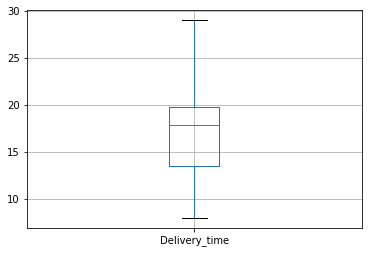

In [ ]:
dataset_1.boxplot(column= ['Delivery_time'])

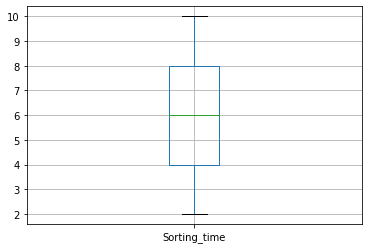

In [ ]:
dataset_1.boxplot(column= ['Sorting_time'])

In [ ]:
# There is no Outlier in the dataset

Corelation Analysis

In [ ]:
dataset_1.corr()

,Delivery_time,Sorting_time
Delivery_time,1.000000,0.825997
Sorting_time,0.825997,1.000000


Fitting the Model

In [ ]:
import statsmodels.formula.api as smf

model = smf.ols("Delivery_time~Sorting_time",data=dataset_1).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


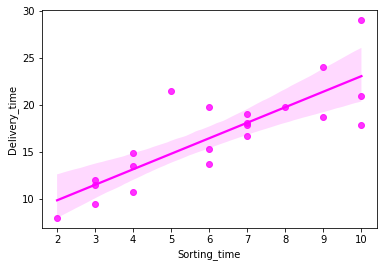

In [ ]:
sns.regplot(x="Sorting_time", y="Delivery_time", data=dataset_1,color= 'magenta');

In [ ]:
#Coefficients
model.params

Intercept       6.582734
Sorting_time    1.649020
dtype: float64

In [ ]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)  

Intercept       3.823349
Sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_time    0.000004
dtype: float64


Checking Accuracy of Model using r2

In [ ]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

 Determination Coefficient = rsquared value = 0.6820 ; good fit = 68.2%

Model Prediction

In [ ]:
# Manual Prediction

In [ ]:
Delivery_time = 6.582734 + 1.649020*(15)  # lets assume sorting_time as 15
Delivery_time

31.318033999999997

In [ ]:
# Automatic Prediction

In [ ]:
#Predict for 10,15,20,30 sorting_time
newdata=pd.Series([10,15,20,30])

In [ ]:
data_pred=pd.DataFrame(newdata,columns=['Sorting_time'])
data_pred

,Sorting_time
0,10
1,15
2,20
3,30


In [ ]:
model.predict(data_pred)

0    23.072933
1    31.318032
2    39.563132
3    56.053331
dtype: float64